In [51]:
from tensorflow import keras
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.utils.np_utils import to_categorical
from keras.models import  Sequential
from keras.preprocessing import image
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# create the training & test sets
train = pd.read_csv("./train.csv")
test= pd.read_csv("./test.csv")
print("Train size:{}\nTest size:{}".format(train.shape, test.shape))

Train size:(42000, 785)
Test size:(28000, 784)


In [53]:
X_train = train.drop(['label'], axis=1).values.astype('float32')
y_train = train['label'].values.astype('int32')
X_test = test.values.astype('float32')

In [54]:
X_train = X_train.reshape(-1, 28, 28,1)
X_test = X_test.reshape(-1, 28, 28,1)
print("Train size:{}\nTest size:{}".format(X_train.shape, X_test.shape))

Train size:(42000, 28, 28, 1)
Test size:(28000, 28, 28, 1)


In [55]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
def standardize(x): 
    return (x-mean_px)/std_px

In [56]:
# one-hot encoding
y_train = to_categorical(y_train)

In [57]:
model = Sequential([
    Lambda(standardize, input_shape=(28,28,1)),
    Conv2D(32,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    Dropout(.5),
    Conv2D(32,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPool2D(),
    Conv2D(64,(3,3), activation='relu'),
    BatchNormalization(axis=1),
    Dropout(.5),
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(),
    Flatten(),
    BatchNormalization(),
    Dropout(.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(.5),
    Dense(10, activation='softmax')
    ])

In [62]:
# Complile keras model
model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# Learning Rate
model.optimizer.lr=0.001

In [65]:
# fit the model
model.fit(X_train, y_train, epochs = 20, batch_size = 64)

Epoch 1/20
42000/42000 [==============================] - 488s 12ms/step - loss: 0.0601 - acc: 0.9814
Epoch 2/20
42000/42000 [==============================] - 436s 10ms/step - loss: 0.0555 - acc: 0.9825
Epoch 3/20
42000/42000 [==============================] - 503s 12ms/step - loss: 0.0529 - acc: 0.9831
Epoch 4/20
42000/42000 [==============================] - 513s 12ms/step - loss: 0.0508 - acc: 0.9844
Epoch 5/20
42000/42000 [==============================] - 451s 11ms/step - loss: 0.0483 - acc: 0.9850
Epoch 6/20
42000/42000 [==============================] - 551s 13ms/step - loss: 0.0459 - acc: 0.9851
Epoch 7/20
42000/42000 [==============================] - 436s 10ms/step - loss: 0.0432 - acc: 0.9865
Epoch 8/20
42000/42000 [==============================] - 379s 9ms/step - loss: 0.0416 - acc: 0.9872
Epoch 9/20
42000/42000 [==============================] - 365s 9ms/step - loss: 0.0384 - acc: 0.9880
Epoch 10/20
42000/42000 [==============================] - 487s 12ms/step - loss: 0.

In [66]:
preds = model.evaluate(X_train, y_train)
print ("Loss = " + str(preds[0]))
print ("Accuracy = " + str(preds[1]))

42000/42000 [==============================] - 215s 5ms/step
Loss = 0.0068161381127664795
Accuracy = 0.9980476190476191


In [84]:
# prediction
predictions = model.predict(X_train).argmax(axis=1)

# extract correct prediction
correct_prediction = (predictions == y_train.argmax(axis=1))

# accuracy
accuracy = np.sum(correct_prediction)
print(accuracy)

# errors on test set
incorrect_prediction = X_train[(predictions != y_train.argmax(axis=1))]

41918


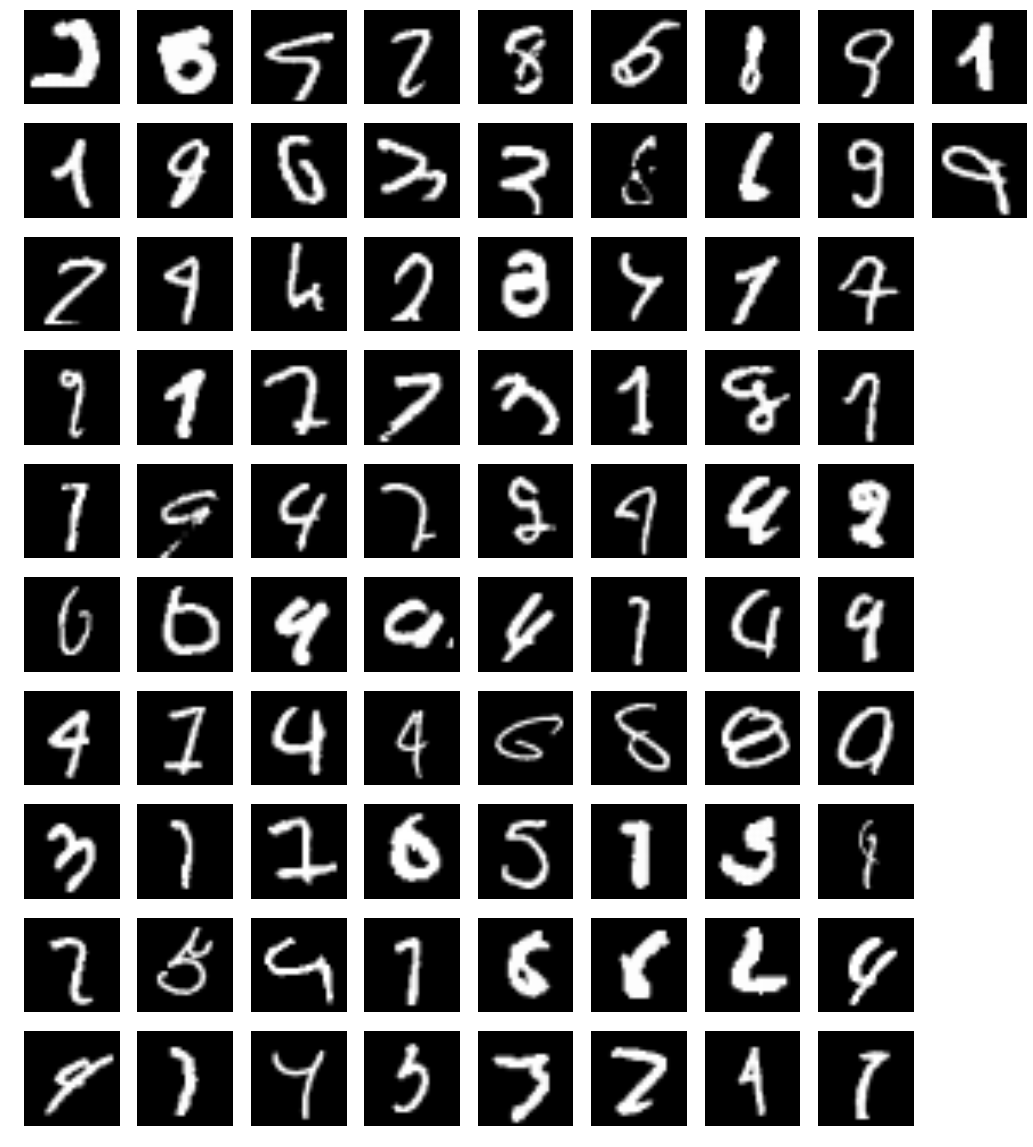

In [91]:
n_line_plot = 10

fig = plt.figure(num=None, figsize=(20, 20))

for idx in range(82):
        col = idx//10
        row = idx%10
        # plot same class column-wise
        plot_idx = col + row*10 + 1
        plt.subplot(n_line_plot,n_line_plot,plot_idx)
        plt.imshow(incorrect_prediction[idx,:].reshape(28,28),cmap='gray')
    
        # Clean plot (remove axes)
        plt.axis('off')
        #if pos == 0:
        #    plt.title(label,fontsize=18)
    
plt.show() 